In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import random

import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import boxcox

from funcs import *
from funcs import famous_list

print(os.listdir('../data/movie'))

['sample_submission.csv', 'test.csv', 'output', '.ipynb_checkpoints', 'train.csv']


In [2]:
def find_collection(x):
    if x == 'none':
        return 3
    else:
        for word in x:
            judge = word.find('Collection')
            if judge > 0:
                return 1
            else:
                return 2

In [3]:
df_train = pd.read_csv('../data/movie/train.csv')
df_test = pd.read_csv('../data/movie/test.csv')
print(df_train.shape, df_test.shape)

(3000, 23) (4398, 22)


In [4]:
df_train['log_rev'] = np.log(df_train['revenue'] + 1)

In [5]:
df_train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'log_rev'],
      dtype='object')

In [6]:
df_train['belongs_to_collection'] = df_train['belongs_to_collection'].fillna('none')
df_test['belongs_to_collection'] = df_test['belongs_to_collection'].fillna('none')

df_train['collection_list'] = df_train['belongs_to_collection'].apply(lambda x: list_from_json(x, 'name'))
df_test['collection_list'] = df_test['belongs_to_collection'].apply(lambda x: list_from_json(x, 'name'))

df_train['collection_var'] = df_train['collection_list'].apply(lambda x: find_collection(x))
df_test['collection_var'] = df_test['collection_list'].apply(lambda x: find_collection(x))

In [7]:
fillna_all(df_train, df_test, 'homepage')

df_train['homepage'][df_train['homepage'] != 'none'] = 1
df_train['homepage'][df_train['homepage'] != 1] = 0
df_test['homepage'][df_test['homepage'] != 'none'] = 1
df_test['homepage'][df_test['homepage'] != 1] = 0

In [8]:
df_train['homepage'].value_counts()

0    2054
1     946
Name: homepage, dtype: int64

In [9]:
fillna_all(df_train, df_test, 'genres')
open_json(df_train, df_test, 'genres')

In [10]:
df_train['genre_list'] = df_train['genres'].apply(lambda x: list_from_json(x, 'name'))
df_test['genre_list'] = df_test['genres'].apply(lambda x: list_from_json(x, 'name'))

genre_unique = make_unique_list(df_train, 'genre_list')

In [11]:
all_power2(df_train, df_test, genre_unique, 'new_genres')

In [12]:
df_train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'log_rev', 'collection_list', 'collection_var', 'new_genres',
       'genre_list', 'Comedy_var', 'Drama_var', 'Family_var', 'Romance_var',
       'Thriller_var', 'Action_var', 'Animation_var', 'Adventure_var',
       'Horror_var', 'Documentary_var', 'Music_var', 'Crime_var',
       'Science Fiction_var', 'Mystery_var', 'Foreign_var', 'Fantasy_var',
       'War_var', 'Western_var', 'History_var', 'TV Movie_var', 'none_var'],
      dtype='object')

In [13]:
Drop = ['belongs_to_collection', 'genres', 'homepage', 'original_title', 'overview',
        'poster_path',  'spoken_languages', 'tagline', 'title', 'Keywords','collection_list',
        'new_genres', 'genre_list', 'new_production_companies', 'company_list',  'release_date',
        'new_production_countries', 'country_list', 'production_companies', 'production_countries',
        'keyword_list', 'imdb_id', 'cast', 'crew']
columns = ['collection_var', 'original_language', 'status']

In [14]:
df_train['release_year'] = df_train['release_date'].apply(lambda x: x[-2:])

df_test['release_date'] = df_test['release_date'].fillna('11/11/00')
df_test['release_year'] = df_test['release_date'].apply(lambda x: x[-2:])

In [15]:
def get_year(year):
    year = int(year)
    if year > 20 and year < 100:
        return 1900 + year
    else:
        return 2000 + year

In [16]:
df_train['release_year'] = df_train['release_year'].apply(lambda x: get_year(x))
df_test['release_year'] = df_test['release_year'].apply(lambda x: get_year(x))

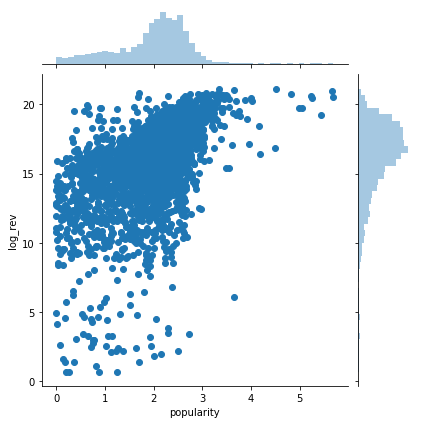

In [17]:
x = np.log(df_train['popularity'] + 1)
y = df_train['log_rev']

sns.jointplot(x, y)

In [18]:
df_train['popularity'] = np.log(df_train['popularity'] + 1)
df_test['popularity'] = np.log(df_test['popularity'] + 1)

In [19]:
fillna_all(df_train, df_test, 'production_companies')
open_json(df_train, df_test, 'production_companies')

In [20]:
df_train['company_list'] = df_train['production_companies'].apply(lambda x: list_from_json(x, 'name'))
df_test['company_list'] = df_test['production_companies'].apply(lambda x: list_from_json(x, 'name'))

company_unique = make_unique_list(df_train, 'company_list')

In [21]:
for unique in company_unique:
    famous_company = famous_list(df_train, 'new_production_companies', unique, 'log_rev')

In [22]:
def select_number_limit(sort, num):
    select_list = []
    for select in sort:
        if sort[select] > num:
            select_list.append([select, sort[select]])
    select_list = dict(select_list)
    return select_list

def select_random(sort, num):
    random_index = random.sample(list(sort.items()), num)
    random_index = dict(random_index)
    return random_index

In [23]:
company_unique = select_random(famous_company, 50)

In [24]:
all_power2(df_train, df_test, company_unique, 'new_production_companies')

In [25]:
df_train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity',
       ...
       'Filmworks/FX_var', 'ZDF Productions_var', 'FilmColony_var',
       'Innovisions_var', 'Metro Tartan Distribution Ltd._var',
       'Mattel Entertainment_var', 'Recorded Picture Company (RPC)_var',
       'HBO Pictures_var', 'Grosvenor Park Media Ltd._var',
       'Mindfire Entertainment_var'],
      dtype='object', length=102)

In [26]:
df_test['status'][df_test['status'] == 'Post Production '] = 'Released'

In [27]:
fillna_all(df_train, df_test, 'production_countries')
open_json(df_train, df_test, 'production_countries')

df_train['country_list'] = df_train['production_countries'].apply(lambda x: list_from_json(x, 'name'))
df_test['country_list'] = df_test['production_countries'].apply(lambda x: list_from_json(x, 'name'))

country_unique = make_unique_list(df_train, 'country_list')

In [28]:
for unique in country_unique:
    famous_country = famous_list(df_train, 'new_production_countries', unique, 'log_rev')

In [29]:
all_power2(df_train, df_test, country_unique, 'new_production_countries')

In [30]:
fillna_all(df_train, df_test, 'Keywords')

df_train['keyword_list'] = df_train['Keywords'].apply(lambda x: list_from_json(x, 'name'))
df_test['keyword_list'] = df_test['Keywords'].apply(lambda x: list_from_json(x, 'name'))

In [31]:
df_train['keyword_var'] = df_train['keyword_list'].apply(lambda x: 0 if x=='none' else len(x))
df_test['keyword_var'] = df_test['keyword_list'].apply(lambda x: 0 if x=='none' else len(x))

fillna_all(df_train, df_test, 'cast')
open_json(df_train, df_test, 'cast')

df_train['cast_list'] = df_train['cast'].apply(lambda x: list_from_json(x, 'name'))
df_test['cast_list'] = df_test['cast'].apply(lambda x: list_from_json(x, 'name'))

cast_unique = make_unique_list(df_train, 'cast_list')

In [32]:
fillna_all(df_train, df_test, 'crew')
open_json(df_train, df_test, 'crew')

In [33]:
df_train['crew_list'] = df_train['crew'].apply(lambda x: list_from_json(x, 'job'))
unique_crew = make_unique_list(df_train, 'crew_list')

In [34]:
unique_crew =random.sample(unique_crew, 50)
all_power(df_train, df_test, unique_crew)

In [35]:
diff_col(df_train, df_test)

{'crew_list', 'log_rev', 'revenue'}

In [36]:
df_train = pd.get_dummies(df_train, columns=columns)
df_test = pd.get_dummies(df_test, columns=columns)

In [37]:
diff_col(df_train, df_test)

{'crew_list',
 'log_rev',
 'original_language_ar',
 'original_language_fa',
 'original_language_mr',
 'original_language_nb',
 'original_language_vi',
 'revenue'}

In [38]:
list(set(df_test.columns) - set(df_train.columns))

['original_language_is',
 'original_language_th',
 'status_Post Production',
 'original_language_bm',
 'original_language_ca',
 'original_language_af',
 'original_language_xx',
 'original_language_kn',
 'original_language_ka']

In [39]:
Drop_train = [ 'original_language_ar', 'original_language_fa', 'original_language_mr',
              'original_language_nb', 'original_language_vi','crew_list']
Drop_test = ['original_language_af', 'original_language_kn', 'original_language_is',
             'original_language_ca', 'original_language_th', 'original_language_ka',
             'original_language_bm', 'original_language_xx','status_Post Production']
df_train.drop(Drop_train, axis=1, inplace=True)
df_test.drop(Drop_test, axis=1, inplace=True)

In [40]:
drop_all(df_train, df_test, Drop)

In [41]:
df_train['runtime'].fillna(df_train['runtime'].median(), inplace=True)
df_test['runtime'].fillna(df_test['runtime'].median(), inplace=True)

In [42]:
df_train.drop(['new_crew'], axis=1, inplace=True)


In [43]:
df_test.drop(['new_crew'], axis=1, inplace=True)

In [44]:
drop_all(df_train, df_test, ['none_var'])

In [90]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

train = df_train.drop(['id', 'revenue', 'log_rev'], axis=1)
train_ = df_train['log_rev']
test = df_test.drop(['id'], axis=1)

X_train = sc.fit_transform(train.values)
y_train = train_.values.reshape(y_train.shape[0], 1)
X_test = sc.fit_transform(test.values)

print(X_train.shape, y_train.shape, X_test.shape)

(3000, 235) (3000, 1) (4398, 235)


In [91]:
maxlen = 50             # 入力系列数
n_in = X_train.shape[1]   # 学習データ（＝入力）の列数
n_out = y_train.shape[1]  # ラベルデータ（=出力）の列数
len_seq = X_train.shape[0] - maxlen + 1
data = []
target = []
for i in range(0, len_seq):
    data.append(X_train[i:i+maxlen, :])
    target.append(y_train[i+maxlen-1, :])

x = np.array(data).reshape(len(data), maxlen, n_in)
t = np.array(target).reshape(len(data), n_out)

print(x.shape, t.shape)

# ここからソースコードの後半
n_train = int(len(data)*0.9)              # 訓練データ長
x_train,x_test = np.vsplit(x, [n_train])  # 学習データを訓練用とテスト用に分割
t_train,t_test = np.vsplit(t, [n_train])  # ラベルデータを訓練用とテスト用に分割

print(x_train.shape, x_test.shape, t_train.shape, t_test.shape)

(2951, 50, 235) (2951, 1)
(2655, 50, 235) (296, 50, 235) (2655, 1) (296, 1)


In [92]:
model = Sequential()
model.add(LSTM(235,
               input_shape=(maxlen, n_in)))
model.add(Dense(1))
model.add(Activation('linear'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 235)               442740    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 236       
_________________________________________________________________
activation_8 (Activation)    (None, 1)                 0         
Total params: 442,976
Trainable params: 442,976
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.compile(optimizer=Adam(), loss='mse', metrics=['mse'])
history = model.fit(x_train, t_train, epochs=50, batch_size=100, validation_split=0.3, verbose=1)
print(history.history.keys())

scores = model.evaluate(x_train, t_train, batch_size=30)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

Instructions for updating:
Use tf.cast instead.
Train on 1858 samples, validate on 797 samples
Epoch 1/50
1858/1858 [==============================] - 6s 3ms/step - loss: 97.5972 - mean_squared_error: 97.5972 - val_loss: 13.0765 - val_mean_squared_error: 13.0765
Epoch 2/50
1858/1858 [==============================] - 5s 3ms/step - loss: 8.7036 - mean_squared_error: 8.7036 - val_loss: 7.4615 - val_mean_squared_error: 7.4615
Epoch 3/50
1858/1858 [==============================] - 5s 3ms/step - loss: 6.3936 - mean_squared_error: 6.3936 - val_loss: 6.2579 - val_mean_squared_error: 6.2579
Epoch 4/50
1858/1858 [==============================] - 5s 3ms/step - loss: 5.7861 - mean_squared_error: 5.7861 - val_loss: 5.8128 - val_mean_squared_error: 5.8128
Epoch 5/50
1858/1858 [==============================] - 5s 3ms/step - loss: 5.3903 - mean_squared_error: 5.3903 - val_loss: 5.4898 - val_mean_squared_error: 5.4898
Epoch 6/50
1858/1858 [==============================] - 5s 3ms/step - loss: 5.069

Epoch 49/50
1858/1858 [==============================] - 8s 4ms/step - loss: 2.6085 - mean_squared_error: 2.6085 - val_loss: 3.6865 - val_mean_squared_error: 3.6865
Epoch 50/50
1858/1858 [==============================] - 8s 4ms/step - loss: 2.5282 - mean_squared_error: 2.5282 - val_loss: 3.6878 - val_mean_squared_error: 3.6878
dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])
2655/2655 [==============================] - 6s 2ms/step
mean_squared_error: 288.10%


from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
predict = svr.predict(X_test)
predict = np.e**predict

from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
predict1 = model.predict(X_test)
predict1 = np.e**predict1
predict1

In [97]:
predict 

array([[14.028906 ],
       [16.84946  ],
       [18.90032  ],
       [13.909214 ],
       [13.174585 ],
       [18.740818 ],
       [13.913991 ],
       [16.045519 ],
       [16.791174 ],
       [18.340439 ],
       [13.783513 ],
       [17.362392 ],
       [10.510033 ],
       [16.152506 ],
       [14.628435 ],
       [19.405447 ],
       [17.26444  ],
       [12.543942 ],
       [13.241642 ],
       [15.335625 ],
       [15.718554 ],
       [13.020502 ],
       [16.185982 ],
       [14.974629 ],
       [14.6038065],
       [17.790049 ],
       [16.19057  ],
       [18.474731 ],
       [12.065294 ],
       [16.62154  ],
       [17.558573 ],
       [17.332108 ],
       [14.069092 ],
       [21.00738  ],
       [19.451141 ],
       [20.000418 ],
       [18.934761 ],
       [15.705346 ],
       [16.290365 ],
       [17.595695 ],
       [17.389425 ],
       [14.887771 ],
       [19.47523  ],
       [15.20813  ],
       [18.096895 ],
       [17.252985 ],
       [16.792215 ],
       [16.69

In [90]:
df_out = pd.read_csv('../data/movie/test.csv')
df_out['revenue'] = predict
df_out[['id', 'revenue']].to_csv('../data/movie/output/deep.csv', index=False, header=True)